In [179]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv("./film_full.csv", encoding="utf-8")
df = df.drop(["Reelgood_Rating"], axis=1)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4455 non-null   int64  
 1   Title        4455 non-null   object 
 2   IMDB_Rating  4455 non-null   float64
 3   Genres       4455 non-null   object 
 4   Year         4455 non-null   int64  
 5   Tags         4455 non-null   object 
 6   Country      2825 non-null   object 
 7   Source       2803 non-null   object 
 8   Rated        1856 non-null   object 
 9   Duration     4324 non-null   object 
 10  Description  4455 non-null   object 
 11  Director     3548 non-null   object 
 12  Employees    4455 non-null   object 
 13  User_Votes   4396 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 487.4+ KB


In [182]:
df.head(5)

,Unnamed: 0,Title,IMDB_Rating,Genres,Year,Tags,Country,Source,Rated,Duration,Description,Director,Employees,User_Votes
0,0,The Lost City,6.2,"['Romance', 'Action & Adventure']",2022,[],America,Epix,13+ (PG-13),PT1H52M,Follows a reclusive romance novelist who was s...,Aaron Nee,"['Adam Nee', 'Sandra Bullock', 'Channing Tatum...","48,599 votes"
1,1,Chip 'n Dale: Rescue Rangers,7.2,"['Action & Adventure', 'Animation']",2022,[],NaN,Disney+,7+ (PG),PT1H39M,Thirty years after their popular television sh...,NaN,[],"13,451 votes"
2,2,Uncharted,6.4,"['Drama', 'Action & Adventure']",2022,['Video Games'],America,NaN,13+ (PG-13),PT1H56M,"A young street-smart, Nathan Drake and his wis...",Ruben Fleischer,"['Tom Holland', 'Mark Wahlberg', 'Antonio Band...","118,363 votes"
3,3,Spider-Man: No Way Home,8.3,"['Comedy', 'Drama']",2021,"['Teen', 'Superhero', 'Supernatural']",America,NaN,13+ (PG-13),PT2H28M,Peter Parker is unmasked and no longer able to...,Jon Watts,"['Tom Holland', 'Zendaya', 'Benedict Cumberbat...","638,869 votes"
4,4,Top Gun,6.9,"['Romance', 'Action & Adventure']",1986,"['Military', 'Feel-good']",America,Paramount+,13+ (PG-13),PT1H50M,"A heart-pounding combination of action, music ...",Tony Scott,"['Tom Cruise', 'Kelly McGillis', 'Val Kilmer',...","337,760 votes"


In [183]:
mlb = MultiLabelBinarizer()
df["Genres"] = df["Genres"].apply(lambda x: x.replace("'", "") if "'" in x else x)
df["Tags"] = df["Tags"].apply(lambda x: x.replace("'", "") if "'" in x else x)
df["Employees"] = df["Employees"].apply(lambda x: x.replace("'", "") if "'" in x else x)

df["Genres"] = df["Genres"].apply(lambda x: x.replace("[", "") if "[" in x else x)
df["Tags"] = df["Tags"].apply(lambda x: x.replace("[", "") if "[" in x else x)
df["Employees"] = df["Employees"].apply(lambda x: x.replace("[", "") if "[" in x else x)

df["Genres"] = df["Genres"].apply(lambda x: x.replace("]", "") if "]" in x else x)
df["Tags"] = df["Tags"].apply(lambda x: x.replace("]", "") if "]" in x else x)
df["Employees"] = df["Employees"].apply(lambda x: x.replace("]", "") if "]" in x else x)

df["Genres"] = df["Genres"].apply(lambda x: x + 'empty' if not x else x)
df["Tags"] = df["Tags"].apply(lambda x: x + 'empty' if not x else x)
df["Employees"] = df["Employees"].apply(lambda x: x + 'empty' if not x else x)

# explode genres
df = df.join(
            pd.DataFrame(
                mlb.fit_transform(df['Genres'].str.split(', ')),
                index=df.index,
                columns="Genre_" + mlb.classes_))

# # explode tags 
# df = df.join(
#             pd.DataFrame(
#                 mlb.fit_transform(df.pop('Tags').str.split(', ')),
#                 index=df.index,
#                 columns="Tag_" + mlb.classes_))

# convert user votes to number
df["User_Votes"] = df["User_Votes"].astype(str)
df['User_Votes'] = df['User_Votes'].apply(lambda x: int(x.replace(",", "").split(" ")[0].strip()) if 'nan' not in x else 0)

# convert duration to number
df["Duration"] = df["Duration"].astype(str)
def convert_to_minutes(str_duration): 
    if str_duration != 'nan':
        str_duration = str_duration[2:].replace("M", "")
        if "H" in str_duration:
            arr_time = str_duration.split("H")
            return int(arr_time[0]) * 60 + int(arr_time[1])
        else:
            return int(str_duration)
    else: return 0
df['Duration'] = df['Duration'].apply(lambda x: convert_to_minutes(x))


In [184]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4455 non-null   int64  
 1   Title                     4455 non-null   object 
 2   IMDB_Rating               4455 non-null   float64
 3   Genres                    4455 non-null   object 
 4   Year                      4455 non-null   int64  
 5   Tags                      4455 non-null   object 
 6   Country                   2825 non-null   object 
 7   Source                    2803 non-null   object 
 8   Rated                     1856 non-null   object 
 9   Duration                  4455 non-null   int64  
 10  Description               4455 non-null   object 
 11  Director                  3548 non-null   object 
 12  Employees                 4455 non-null   object 
 13  User_Votes                4455 non-null   int64  
 14  Genre_Ac

,Unnamed: 0,Title,IMDB_Rating,Genres,Year,Tags,Country,Source,Rated,Duration,...,Genre_Horror,Genre_LGBTQ,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Science-Fiction,Genre_Sport,Genre_Stand-up & Talk,Genre_Thriller,Genre_empty
0,0,The Lost City,6.2,"Romance, Action & Adventure",2022,empty,America,Epix,13+ (PG-13),112,...,0,0,0,0,1,0,0,0,0,0
1,1,Chip 'n Dale: Rescue Rangers,7.2,"Action & Adventure, Animation",2022,empty,NaN,Disney+,7+ (PG),99,...,0,0,0,0,0,0,0,0,0,0
2,2,Uncharted,6.4,"Drama, Action & Adventure",2022,Video Games,America,NaN,13+ (PG-13),116,...,0,0,0,0,0,0,0,0,0,0
3,3,Spider-Man: No Way Home,8.3,"Comedy, Drama",2021,"Teen, Superhero, Supernatural",America,NaN,13+ (PG-13),148,...,0,0,0,0,0,0,0,0,0,0
4,4,Top Gun,6.9,"Romance, Action & Adventure",1986,"Military, Feel-good",America,Paramount+,13+ (PG-13),110,...,0,0,0,0,1,0,0,0,0,0


<h2>Top 20 phim được đánh giá cao nhất</h2>

In [185]:
top20_films = df.sort_values(by='IMDB_Rating', ascending=False)[:20]

Text(0.5, 0.98, 'High rating film')

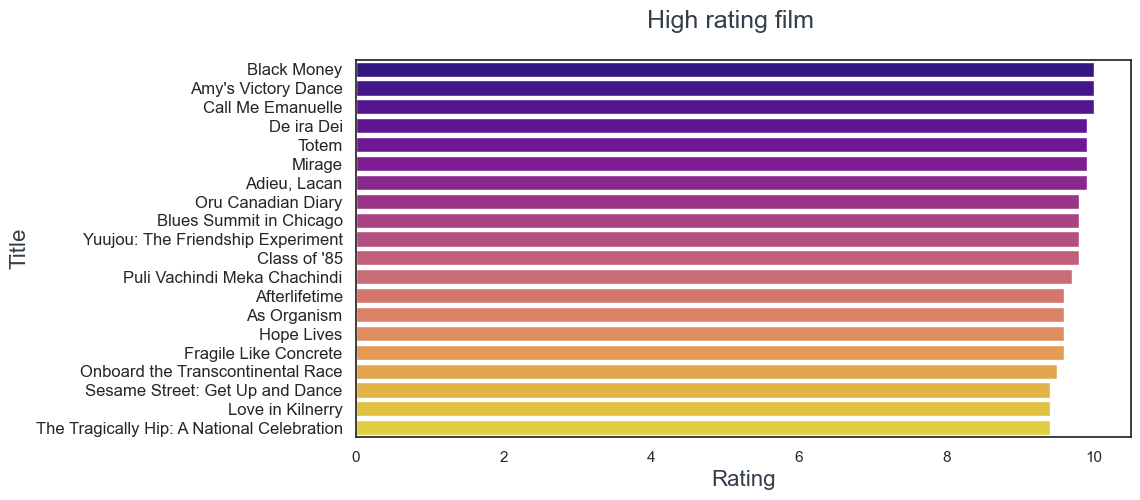

In [186]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
plt.yticks(size=12)
sns.set(style="darkgrid")
# plot the data
sns.barplot(data=top20_films, x='IMDB_Rating', y='Title', palette='plasma')
# set x and y-axis labels and title
ax.set_xlabel('Rating', fontsize=16, color = '#333F4B')
ax.set_ylabel('Title', fontsize=16, color = '#333F4B')
fig.suptitle('High rating film',fontsize=18, color = '#333F4B')

<h2>Phần lớn các bộ phim được đánh giá như thế nào?</h2>

d:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


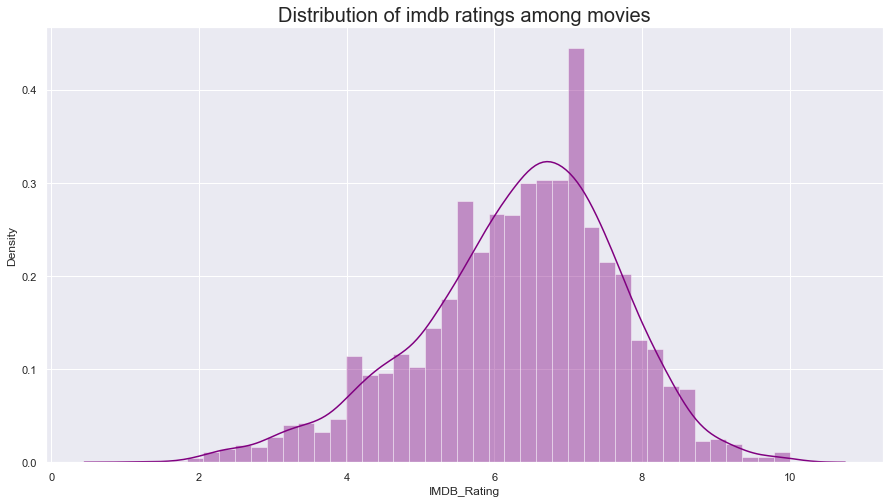

In [187]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df['IMDB_Rating'], color="purple");
plt.title("Distribution of imdb ratings among movies", size = 20);

<h2>Tần suất phát hành phim qua các năm</h2>

In [188]:
years = []
df['Year'].apply(lambda x: years.append(x))
unique, counts = np.unique(years, return_counts=True)
year_dataframe = pd.DataFrame({"unique":unique,"counts":counts})
year_dataframe = year_dataframe.sort_values(['counts'],ascending=[False])

Text(0.5, 0.98, 'Movie release frequency by years')

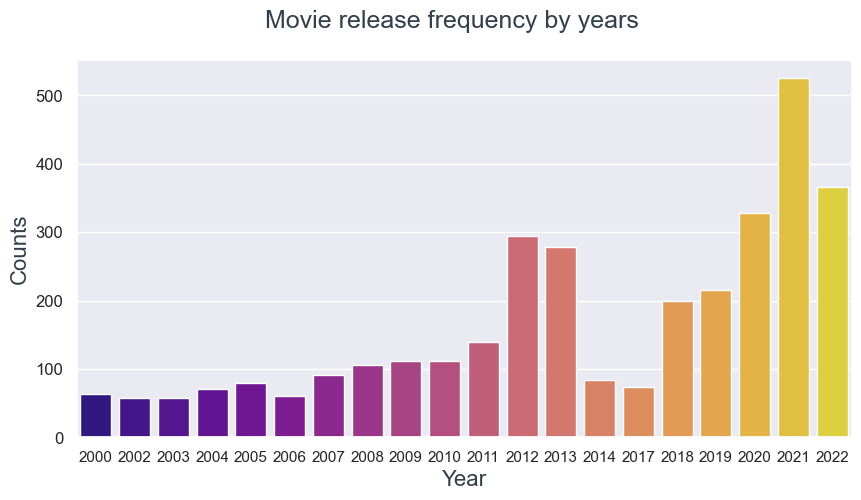

In [189]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
plt.yticks(size=12)
sns.set(style="darkgrid")
# plot the data
sns.barplot(data=year_dataframe[:20], x='unique', y='counts', palette='plasma')
# set x and y-axis labels and title
ax.set_xlabel('Year', fontsize=16, color = '#333F4B')
ax.set_ylabel('Counts', fontsize=16, color = '#333F4B')
fig.suptitle('Movie release frequency by years',fontsize=18, color = '#333F4B')

2021 la nam co tan suat chieu phim cao nhat (co the la do dai dich covid duoc phuc hoi va nen cong nghiep dien anh bat dau hoat dong tro lai)

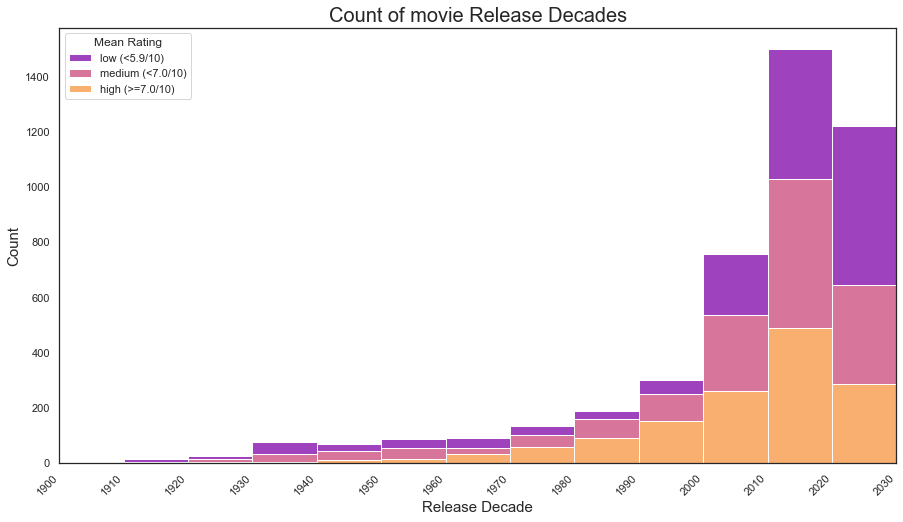

In [190]:
# create three main categories of mean rating
df['mean_rating_qcut'], qcut_mean_ratings = pd.qcut(x=df['IMDB_Rating'], q=3, retbins=True)
mean_rating_labels = ['low (<' + str(qcut_mean_ratings[1]) + '/10)',
                   'medium (<' + str(qcut_mean_ratings[2]) + '/10)',
                   'high (>=' + str(qcut_mean_ratings[2]) + '/10)']
df['mean_rating_qcut'] = pd.qcut(x=df['IMDB_Rating'], q=3, labels=mean_rating_labels)
# find decade of dataset
df['Decade'] = (df['Year']//10)*10
n_bins = int(((df['Decade'].max()-df['Decade'].min())/10)+1)

# Count of movies release year
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Count of movie Release Decades', size=20)
ax = sns.histplot(data=df.sort_values(by='mean_rating_qcut', ascending=True), x='Decade', hue='mean_rating_qcut', multiple='stack', bins=n_bins, binrange=(df['Decade'].min(), df['Decade'].max()+10), palette='plasma')
ax.margins(x=0)
ax.legend_.set_title('Mean Rating') 
plt.xlabel('Release Decade', size=15)
plt.ylabel('Count', size=15)
plt.xticks(np.arange(df['Decade'].min(), df['Decade'].max()+20, step=10), rotation=45, ha='right')
plt.show()

thap ki 2010 co the duoc xem la thap ki co chat luong phim tot nhat va so luong phim nhieu nhat

<h2>Most popular genres</h2>

In [191]:
genres = []
df['Genres'].apply(lambda x: genres.append(str(x).split(", ")))
all_genres = np.array([genre for sub_list in genres for genre in sub_list])
unique, counts = np.unique(all_genres, return_counts=True)
genre_dataframe = pd.DataFrame({"unique":unique,"counts":counts})
genre_dataframe = genre_dataframe.sort_values(['counts'],ascending=[False])

Text(0.5, 0.98, 'Most popular genres')

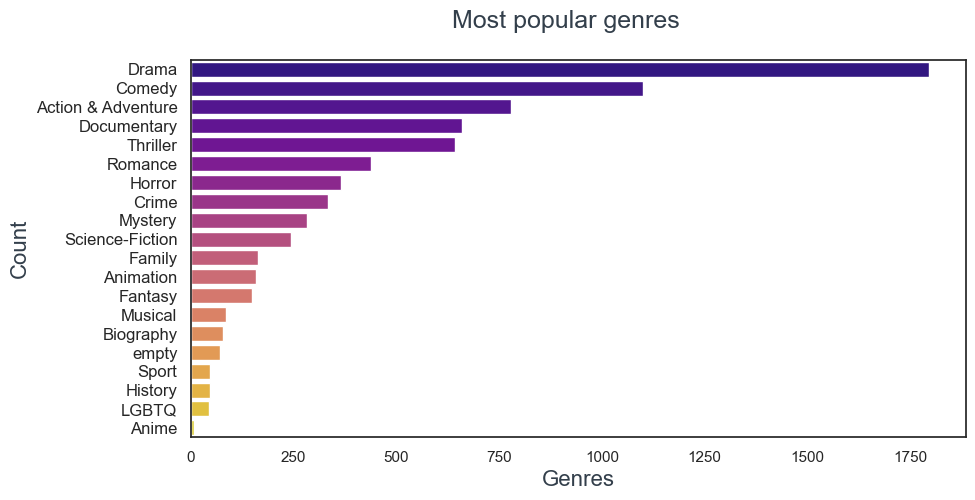

In [192]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
plt.yticks(size=12)
sns.set(style="darkgrid")
# plot the data
sns.barplot(data=genre_dataframe[:20], x='counts', y='unique', palette='plasma')
# set x and y-axis labels and title
ax.set_xlabel('Genres', fontsize=16, color = '#333F4B')
ax.set_ylabel('Count', fontsize=16, color = '#333F4B')
fig.suptitle('Most popular genres',fontsize=18, color = '#333F4B')

<img src="https://scontent.fdad3-4.fna.fbcdn.net/v/t1.6435-9/40506420_1428681267266723_4159529269006958592_n.jpg?_nc_cat=101&ccb=1-7&_nc_sid=e3f864&_nc_ohc=1iia7R9HhekAX_CnV1P&_nc_ht=scontent.fdad3-4.fna&oh=00_AT9a2-BQ5lT_uneLWrffcEpZXN8HzleUj03ZMsaGOzx0BQ&oe=62BB926C" alt="imgage" style="display:block; width: 50%; margin: 0 auto" />
<p>Có thể các nhà làm phim muốn đánh vào thị hiếu số đông (giới trẻ rất thích hóng các drama nổ ra)</p>

<h2>Mean rating of each genre</h2>

In [193]:
genre_df = df.loc[:, df.columns.str.startswith('Genre')].join(df['IMDB_Rating'])
genre_df = genre_df.drop(['Genre_empty'], axis=1)

# create dict
dict_genre = {}
for column in genre_df.columns[1:-1]:
    dict_genre[column] = np.array([])

# add imdb rating each genre into dict 
def add_rating(x):
    for i in x[1:-1].keys():
        if x[i] == 1:
            dict_genre[i] = np.append(dict_genre[i], x[-1])
genre_df.apply(lambda x: add_rating(x), axis=1)

# calc mean
for i in dict_genre:
    dict_genre[i] = np.mean(dict_genre[i])

dict_df = pd.DataFrame.from_dict(dict_genre, orient='index')
dict_df["Genre"] = dict_df.index

Text(0.5, 0.98, 'Mean Rating of each genre')

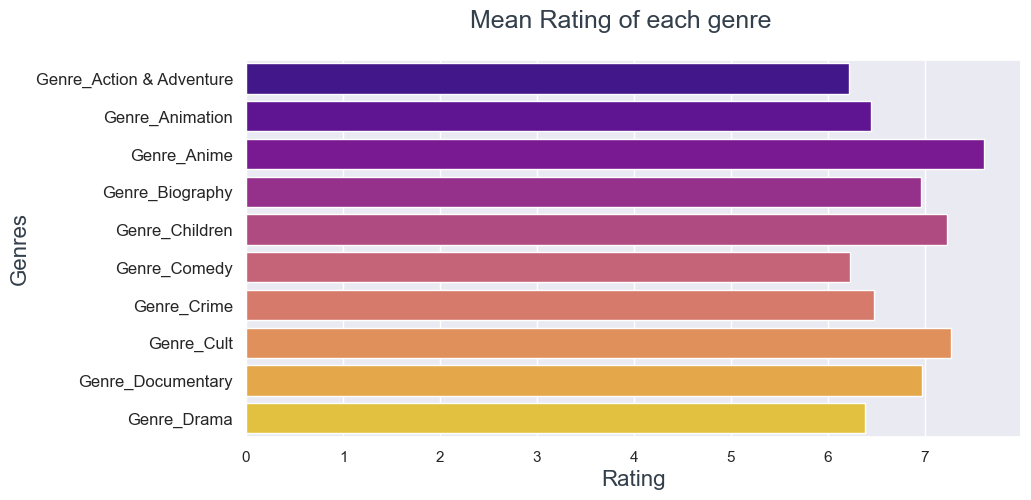

In [194]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
plt.yticks(size=12)
sns.set(style="darkgrid")
# plot the data
sns.barplot(data=dict_df[:10], x=0, y="Genre", palette='plasma')
# set x and y-axis labels and title
ax.set_xlabel('Rating', fontsize=16, color = '#333F4B')
ax.set_ylabel('Genres', fontsize=16, color = '#333F4B')
fig.suptitle('Mean Rating of each genre',fontsize=18, color = '#333F4B')

<p>Các thể loại dành cho độ tuổi thiếu nhi thì có độ rating cao hơn các thể loại khác. Thể loại phim dành cho tôn giáo cũng được cộng đồng đón nhận mạnh mẽ</p>

<h2>Top 10 movie release countries</h2>

In [195]:
languages = []
df['Country'].apply(lambda x: languages.append(x) if str(x).strip() != 'nan' else None)
unique_language, counts_language = np.unique(languages, return_counts=True)
language_dataframe = pd.DataFrame({"unique":unique_language,"counts":counts_language})
language_dataframe = language_dataframe.sort_values(['counts'],ascending=[False])

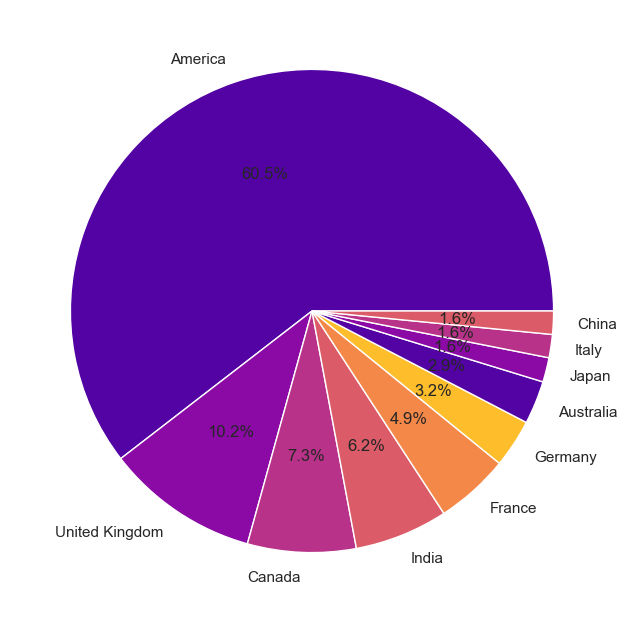

In [196]:
data = language_dataframe['counts'][0:10]
labels = language_dataframe['unique'][0:10]

#define Seaborn color palette to use
colors = sns.color_palette('plasma')

#create pie chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.pie(data, labels = labels, colors = colors, autopct="%.1f%%");

<p>Qua đây ta có thể thấy được nền công nghiệp điện ảnh ở Mỹ phát triển rất mạnh mẽ. Và rất may thay netflix có phụ đề tiếng việt, nếu không muốn coi được nhiều phim bắt buộc chúng ta phải giỏi tiếng anh</p>
<img src="https://media3.giphy.com/media/3oEhmI1Y4GlCPczg1W/giphy.gif?cid=ecf05e476ac1hr00h22jjqjyaf2qxdro1fr34kicsk1d1k5h&rid=giphy.gif&ct=g" style="display:block; width: 50%; margin: 0 auto" alt="gif" />

<h2>How long are the movies?</h2>

d:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


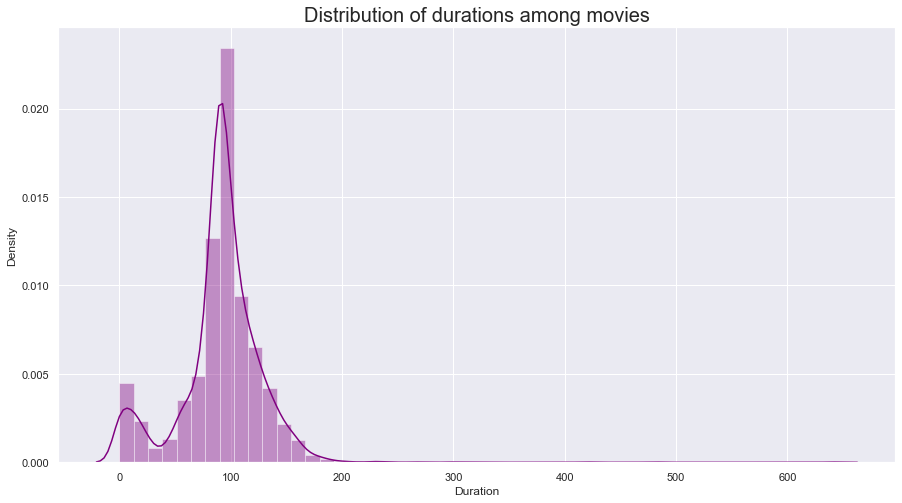

In [197]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df['Duration'], color="purple");
plt.title("Distribution of durations among movies", size = 20);

<p>Đa số các bộ phim có độ dài từ 1 tiếng rưỡi. Chúng ta sẽ thử xem xét độ tương quan giữa thời luợng phim với rating</p>

<h2>Correlation of duration and IMDB rating</h2>

<AxesSubplot:xlabel='Duration', ylabel='IMDB_Rating'>

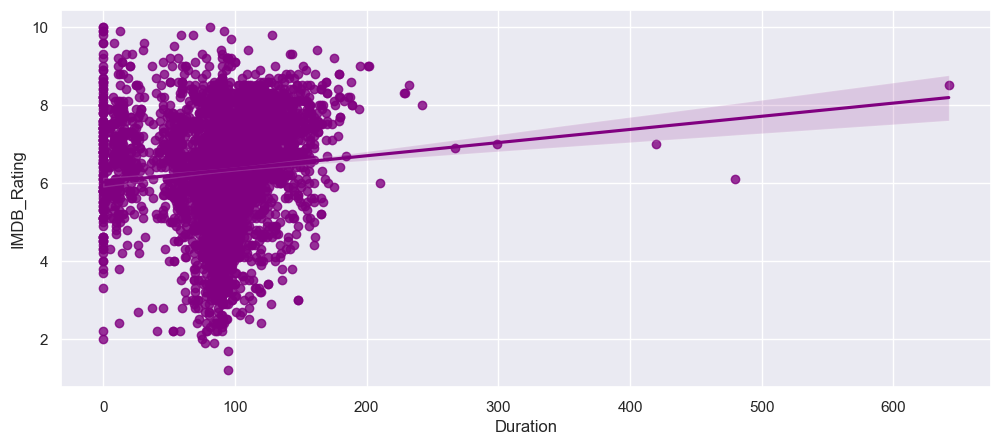

In [198]:
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=100)
sns.set(style="darkgrid")
# plot data
sns.regplot(data=df, x='Duration', y='IMDB_Rating', color='purple', ax=ax1)

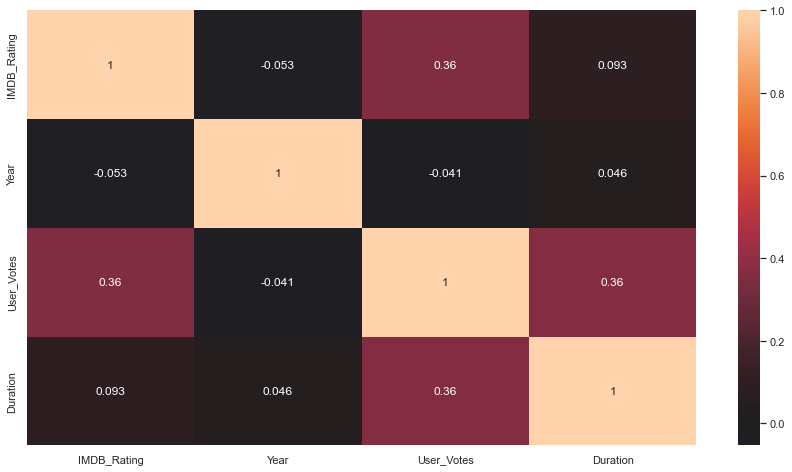

In [199]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df[['IMDB_Rating', 'Year', 'User_Votes', 'Duration']].corr(),
            center=0, annot=True
           );

<p>Có vẻ nó không liên quan quái gì đến nhau cả. Tuy nhiên thì số điểm Rating lại có sự tương quan với số người vote.<br /> Bây giờ chúng ta sẽ xem xét sự tương quan giữa Rating với các thể loại phim:</p>

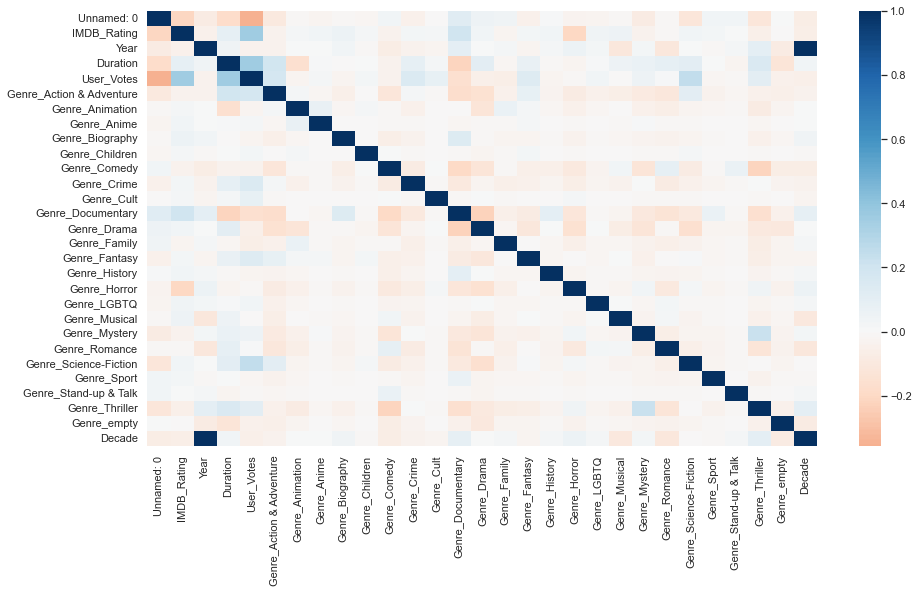

In [200]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), 
            center = 0, 
           cmap = 'RdBu');

<p>Ta có thể thấy được trong bộ dataset này thì đặc trưng Rating có độ tương quan thấp đối với các đặc trưng khác. <br />
User votes và thể loại phim tài liệu thì sự tương quan với rating cao hơn các đặc trưng khác</p>